# Part II - (Ford GoBike System Data Exploration)
## byOkon Elizabeth Queen


## Investigation Overview


> The goal of this analysisis to explore the factors that affect the duration of a ride,the most popular start and end station, the longest duration of a ride, what gender rides the most.


## Dataset Overview

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.There are 183,412 bike in the dataset with 16 features

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
bikes=pd.read_csv('201902-fordgobike-tripdata.csv')
bikes.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
# Make copies of original piece of data before cleaning.
bikes_clean = bikes.copy()

In [4]:
bikes_clean['start_time'] = pd.to_datetime(bikes_clean['start_time'])
bikes_clean['end_time'] = pd.to_datetime(bikes_clean['end_time'])

In [5]:
bikes_clean['start_hour'] = bikes_clean['start_time'].dt.hour
bikes_clean['end_hour'] = bikes_clean['end_time'].dt.hour

In [6]:
# Duration in seconds to duration in minutes
bikes_clean['duration_min'] = bikes_clean['duration_sec']/60
bikes_clean['duration_min'] = bikes_clean['duration_min'].astype(int)

# Duration in seconds to duration in hours
bikes_clean['duration_hour'] = bikes_clean['duration_sec']/3600
bikes_clean['duration_hour'] = bikes_clean['duration_hour'].astype(int)

In [7]:
bikes_clean.dropna(inplace= True)

In [8]:
bikes_clean['member_birth_year'] = bikes_clean['member_birth_year'].astype(int)

In [9]:
# To get their present age i have to minus 2022 from thier year of birth
bikes_clean['age'] = 2022 - bikes_clean['member_birth_year']
bikes_clean['age'] = bikes_clean['age'].astype(int)

## Visualization 1

>How does age affect the duration of the trip?


There is a weak negative correlation between the duration and the age. The older the user, the shorter the duration of the trip.

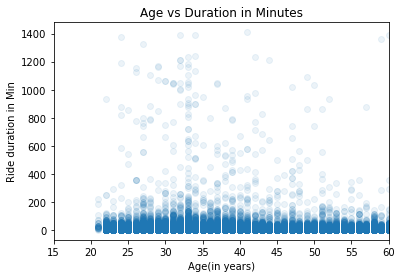

In [10]:
plt.scatter(x = bikes_clean['age'], y = bikes_clean['duration_min'], alpha = 1/12)
plt.xlabel('Age(in years)')
plt.ylabel ('Ride duration in Min')
plt.xlim((15,60))
plt.title('Age vs Duration in Minutes');

## Visualization 2

> How does user type affect the duration of the trip?

The visualisation shows that Customers ride for a longer period than Subscribers although most of the users are subscribers

In [11]:
#Create a vertical bar chart using Seaborn, with a uniform single color
base_color = sns.color_palette()[0]

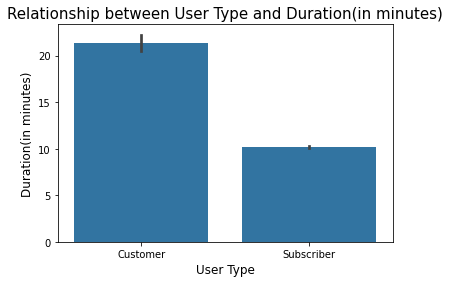

In [12]:
sns.barplot(data=bikes_clean, x='user_type', y='duration_min', color= base_color);
plt.xlabel('User Type', fontsize=12)
plt.ylabel('Duration(in minutes)', fontsize = 12)
plt.title('Relationship between User Type and Duration(in minutes)', fontsize = 15);

## Visualization 3

>How does age and gender affect bike share for trip?

The violin plot shows that for all genders, most young people (between the ages of 20-30) share their trips and older people not as much.

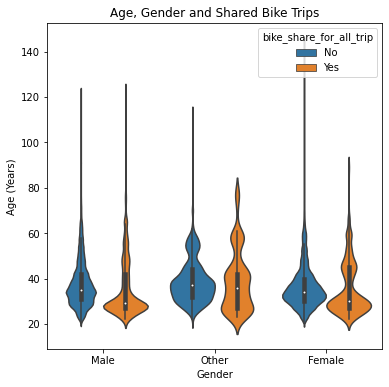

In [13]:
plt.figure(figsize=[6,6])
sns.violinplot(data=bikes_clean,x='member_gender',y='age',hue='bike_share_for_all_trip')
plt.xlabel('Gender')
plt.ylabel('Age (Years)')
plt.title('Age, Gender and Shared Bike Trips');

In [14]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

^C
